In [22]:
import json
import os
import sys
import glob
import re
import string
import data_utils
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['get_tweets.py',
 '.ipynb_checkpoints',
 'data_manipulation_eda.ipynb',
 'data_utils.py',
 '.git',
 'Dockerfile',
 'data',
 'keys.yaml',
 '__pycache__',
 'README.md']

In [5]:
data_folder = './data'
data_dems = data_folder + '/democrats'
data_reps = data_folder + '/republicans'

In [6]:
dem_data_filenames = os.listdir(data_dems)
rep_data_filenames = os.listdir(data_reps)

In [7]:
dem_data_files = []
rep_data_files = []
for fn in dem_data_filenames:
    dem_data_files.append(os.path.join(data_dems, fn))
for fn in rep_data_filenames:
    rep_data_files.append(os.path.join(data_reps, fn))

In [8]:
dem_data_files

['./data/democrats/ElizabethWarren_tweets.jsonl',
 './data/democrats/BernieSanders_tweets.jsonl',
 './data/democrats/JoeBiden_tweets.jsonl',
 './data/democrats/KamalaHarris_tweets.jsonl']

In [9]:
with open(dem_data_files[2]) as file:
    lines = file.readlines()

In [13]:
print(json.loads(lines[0])['full_text'])

Georgia — The nation is looking to you to lead us forward. 

The power is in your hands: https://t.co/RIJ1L4B5o9 https://t.co/BhZ3Mcfozm


In [17]:
json.loads(lines[0])['full_text'].replace('\n', '')

'Georgia — The nation is looking to you to lead us forward. The power is in your hands: https://t.co/RIJ1L4B5o9 https://t.co/BhZ3Mcfozm'

In [19]:
# new lines
# hyphens
# punctuation

In [69]:
temp = json.loads(lines[0])['full_text']

In [70]:
temp

'Georgia — The nation is looking to you to lead us forward. \n\nThe power is in your hands: https://t.co/RIJ1L4B5o9 https://t.co/BhZ3Mcfozm'

In [566]:
def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'http://\S+|https://\S+', '', text) # removes urls
    text = re.sub(r'(@\w+\b)', '', text) # removes mentions
    text = re.sub(r'[^\w\s]', '', text) # removes punctuation
    text = re.sub(r'\d', '', text) # removes numbers
    text = text.replace('\xa0', '') # removes non-breaking whitespace
    text = text.replace('  ', ' ') # removes double spaces
    text = text.replace('  ', ' ') # double space removal again for edge cases
    text = text.strip() # removes trailing and leading whitespaces
    text = text.lower() # converts to lower case
    return text

In [347]:
clean_text(temp)
# temp = temp.replace('\n', '')
# temp = re.sub(r'http://\S+|https://\S+', '', temp)
# temp = re.sub(r'[^\w\s]', '', temp)
# temp = temp.replace('  ', ' ')
# temp = temp.strip()
# temp = temp.lower()

'georgia the nation is looking to you to lead us forward the power is in your hands'

In [421]:
dem_data_files[1]

'./data/democrats/BernieSanders_tweets.jsonl'

In [422]:
def file_iter(filepath):
    with open(filepath) as file:
        for line in file:
            tweet = json.loads(line)
            text = tweet['full_text']
#             cleaned_text = clean_text(text)
            yield(text)

In [431]:
text_gen = file_iter(dem_data_files[1])

In [564]:
a = next(text_gen)
a

'Workers at meat processing plants, at Amazon, and around the country have been treated shamefully during this pandemic\n\nWorking class Americans need $1200 payments to get them through this crisis, not immunity for corporations putting their lives at risk. https://t.co/1Lf6djc3Bg'

In [565]:
clean_text(a)

'workers at meat processing plants at amazon and around the country have been treated shamefully during this pandemic working class americans need payments to get them through this crisis not immunity for corporations putting their lives at risk'

In [5]:
os.listdir('./data/democrats')

['ElizabethWarren_tweets.jsonl',
 'BernieSanders_tweets.jsonl',
 'JoeBiden_tweets.jsonl',
 'KamalaHarris_tweets.jsonl']

In [12]:
re.findall(r'^(.*?)\_tweets\.jsonl', 'ElizabethWarren_tweets.jsonl')[0]

'ElizabethWarren'

In [10]:
class PartySet:
    
    """
    Iterator for Political Party's tweets
    """
    
    def __init__(self, path_to_party_tweets):
        self.data_folder = path_to_party_tweets
        self.filenames = os.listdir(self.data_folder)
        self.filepaths = [os.path.join(self.data_folder, fn) for fn in self.filenames]
        self.representatives = [re.findall(r'^(.*?)\_tweets\.jsonl', fn)[0] for fn in self.filenames]
        
    def text_iter(self):
        for file in self.filepaths:
            with open(file) as f:
                for line in f:
                    tweet = json.loads(line)
                    text = data_utils.clean_text(tweet['full_text'])
                    yield(text)
    
    def get_all_text(self):
        all_text = []
        gen = self.text_iter()
        while True:
            try:
                text = next(gen)
                all_text.append(text)
            except StopIteration:
                break
        return all_text

In [11]:
dem_set = PartySet('./data/democrats')

In [42]:
gen = dem_set.text_iter()

In [12]:
all_text = dem_set.get_all_text()

In [13]:
all_text

['corruption is on the ballot in georgia today',
 'understand this donald trump and his republican enablers are trying to overturn the will of the people they wont succeed but they are setting a dangerous precedentand everyone who believes in democracy needs to speak out and say enough is enough',
 'todays the last day to vote georgia if you havent voted yet make a plan to cast your ballot for and today',
 'im honored to call a dear friend her voice in congress is indispensable she leads with conviction and she fights from the heart',
 'everything is at stake in georgia be a part of this fight and help and cross the finish line',
 'when giant corporations like google have too much power its bad for innovation bad for consumersand bad for their workers im standing in solidarity with google workers as they fight back by unionizing',
 'join me tonight at pm et for a phone bank for and help georgia flip the senate and give mitch mcconnell a demotion sign up here',
 'happy new year were sti

In [16]:
total_tweets = len(all_text)
total_words = 0
for i in range(len(all_text)):
    words = all_text[i].split(' ')
    num_words = len(words)
    total_words += num_words

In [18]:
total_words, total_tweets

(318722, 10151)

In [20]:
big_string = ' '.join(all_text)
wordcloud = WordCloud().generate(big_string)

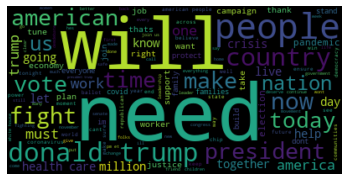

In [23]:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
rep_set = PartySet('./data/republicans')
rep_text = rep_set.get_all_text()
rep_big_string = ' '.join(rep_text)
repCloud = WordCloud().generate(rep_big_string)

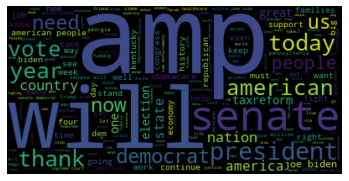

In [25]:

plt.imshow(repCloud, interpolation='bilinear')
plt.axis("off")
plt.show()